In [1]:
from mlp_mixer import * 

image_width_height = 32 #da cambiare a seconda della dimensione dell'immagine
patch_dims = 16
# variable_name = value #paper value
n_channels = 100 #512

num_layers = 8
mlp_dc_dimension = 1024 #2048 # dc è la dimensione del channel mixing (l'ultimo mlp)
mlp_ds_dimension = 128 #256 # ds è la dimensione del token mixing (il primo)

model = MLP_mixer(img_h_w=image_width_height, patch_dim=patch_dims, n_channels=n_channels, num_mixers_layers=num_layers,
    hidden_dim_mlp_token=mlp_ds_dimension, hidden_dim_mlp_channel=mlp_dc_dimension)

model.load_state_dict(torch.load("./models/mlpmixer_20220308-175232.pth"))
model.eval()


MLP_mixer(
  (patch_embedder): Conv2d(3, 100, kernel_size=(16, 16), stride=(16, 16))
  (mixerlayers): ModuleList(
    (0): MixerLayer(
      (layer_norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=4, out_features=128, bias=True)
          (1): GELU()
          (2): Linear(in_features=128, out_features=4, bias=True)
        )
      )
      (MLP2): MLP(
        (linear_gelu_stack): Sequential(
          (0): Linear(in_features=100, out_features=1024, bias=True)
          (1): GELU()
          (2): Linear(in_features=1024, out_features=100, bias=True)
        )
      )
    )
    (1): MixerLayer(
      (layer_norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
      (MLP1): MLP(
        (linear_gelu_stack): Sequential(
        

In [2]:
print(model.mixerlayers[0].MLP1.linear_gelu_stack[0])


Linear(in_features=4, out_features=128, bias=True)


In [3]:
import numpy as np
block0 = model.mixerlayers[0].MLP1.linear_gelu_stack[0].weight.detach().numpy()
block1 = model.mixerlayers[0].MLP1.linear_gelu_stack[2].weight.detach().numpy()

In [4]:
# ogni riga è una weight visualization
width = int(block0.shape[1]/2)
row = block0[0].reshape(width, width)


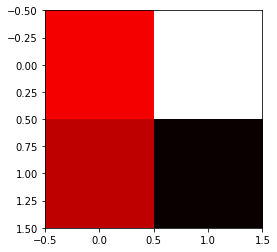

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.imshow(row, cmap='hot', interpolation='nearest')
plt.show()

In [33]:
block = block0 #per block1, uguale facendo trasposizione
width = int(block0.shape[1]/2)
fig, axs = plt.subplots(block0.shape[0], patch_dims)

for i in enumerate(block):
    row = block[0].reshape(width, width)
    print(i)
    axs[0, 0].plot(x, y)

#axs[0, 0].plot(x, y)
#axs[0, 0].set_title('Axis [0, 0]')


(0, array([-0.1595518,  0.2413648, -0.2080895, -0.3756903], dtype=float32))
(1, array([-0.20292296, -0.33858463, -0.11681109,  0.01898966], dtype=float32))
(2, array([ 0.4866652 ,  0.0214023 ,  0.39457884, -0.00869806], dtype=float32))
(3, array([-0.31149507,  0.4199957 , -0.19414306, -0.49260104], dtype=float32))
(4, array([ 0.05337822, -0.47934797,  0.30868778, -0.22382317], dtype=float32))
(5, array([-0.22099027, -0.3229945 , -0.12747045,  0.2297433 ], dtype=float32))
(6, array([ 0.06477486,  0.07937355,  0.05729795, -0.43433282], dtype=float32))
(7, array([ 0.3368499 , -0.4739006 , -0.32561126, -0.37647164], dtype=float32))
(8, array([-0.0059655 ,  0.00840309,  0.3123905 , -0.28992465], dtype=float32))
(9, array([-0.10414053, -0.33387795,  0.24419138,  0.42555523], dtype=float32))
(10, array([ 0.16537608, -0.16027331,  0.18001759, -0.07345171], dtype=float32))
(11, array([-0.43693265, -0.300744  , -0.27775458, -0.25229776], dtype=float32))
(12, array([-0.12828739,  0.30958644,  0.1

KeyboardInterrupt: 